In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart disease prediction.csv to Heart disease prediction.csv


In [3]:
import io
heart_disease_df = pd.read_csv(io.BytesIO(uploaded["Heart disease prediction.csv"]),encoding='latin')
heart_disease_df.info

<bound method DataFrame.info of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   

In [4]:
# Checking for missing values in the Heart Disease Prediction dataset
heart_disease_missing_values = heart_disease_df.isnull().sum()
heart_disease_missing_values[heart_disease_missing_values > 0]

Series([], dtype: int64)

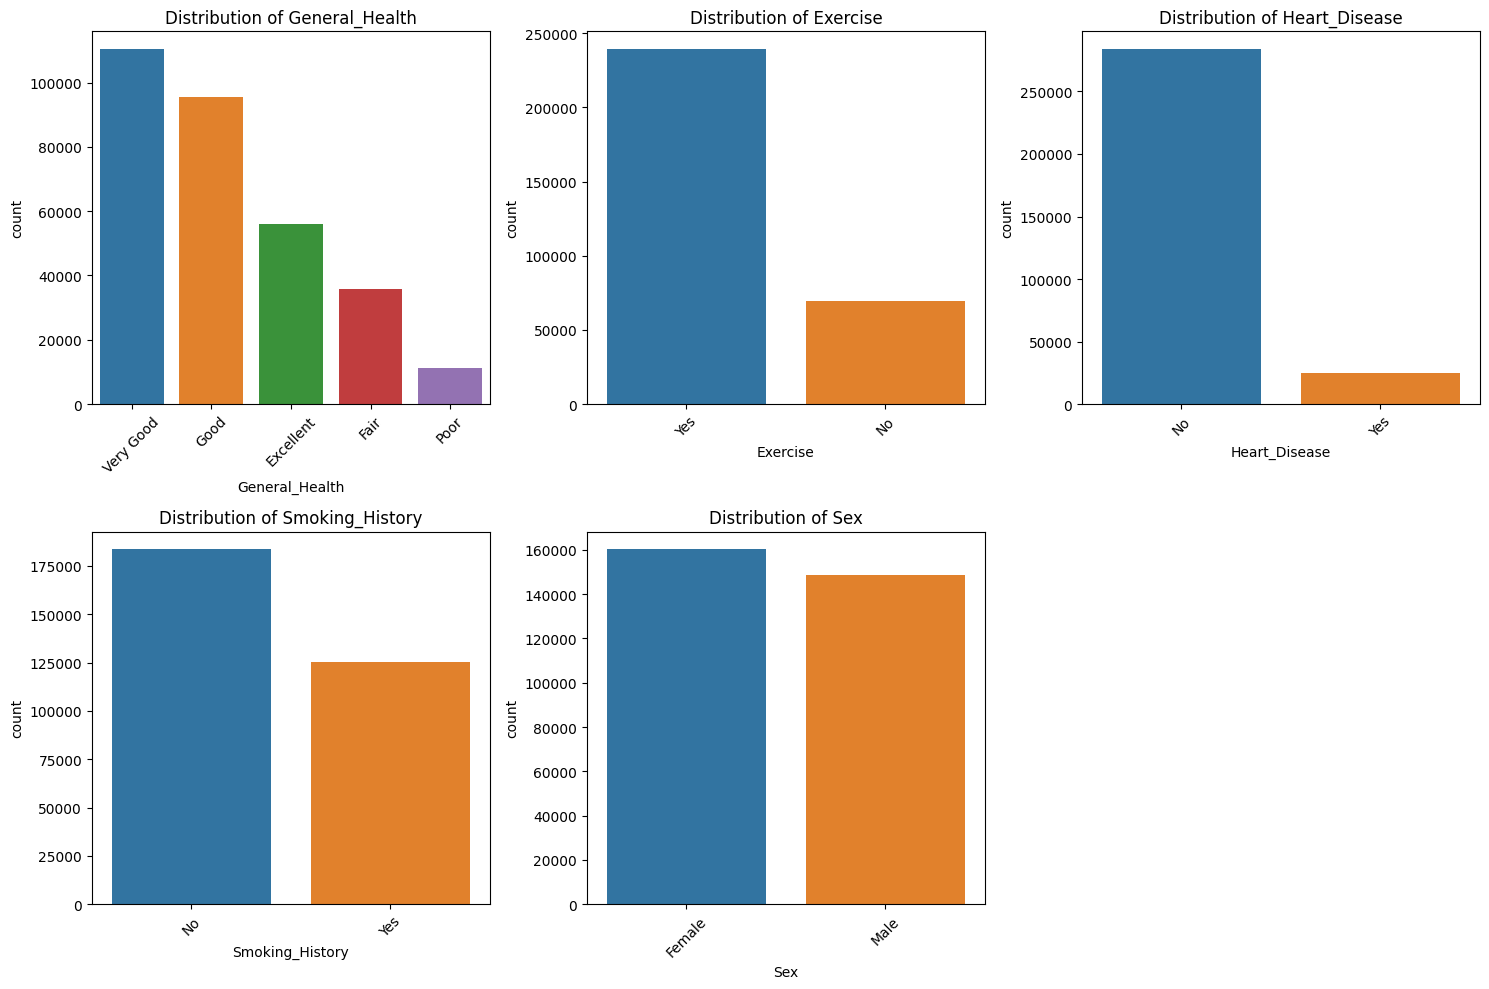

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to analyze
categorical_features = ['General_Health', 'Exercise', 'Heart_Disease', 'Smoking_History', 'Sex']

# Plotting the distribution of categorical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(categorical_features):
    plt.subplot(2, 3, idx + 1)
    sns.countplot(data=heart_disease_df, x=feature, order=heart_disease_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


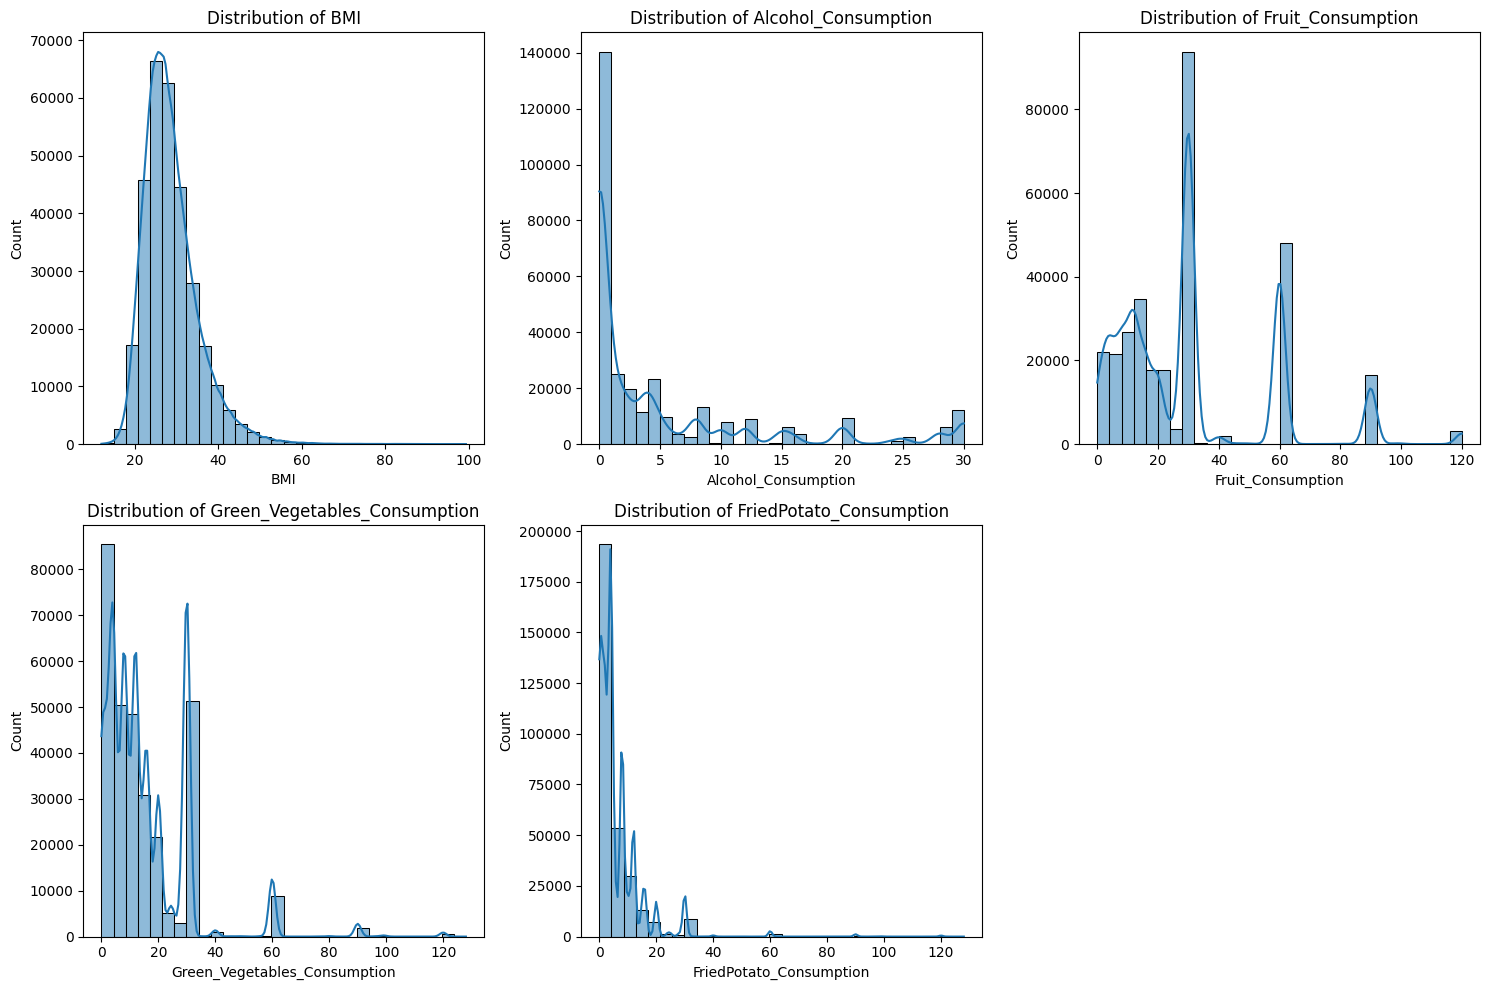

In [6]:
# List of numerical features to analyze
numerical_features = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
                      'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(numerical_features):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(heart_disease_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


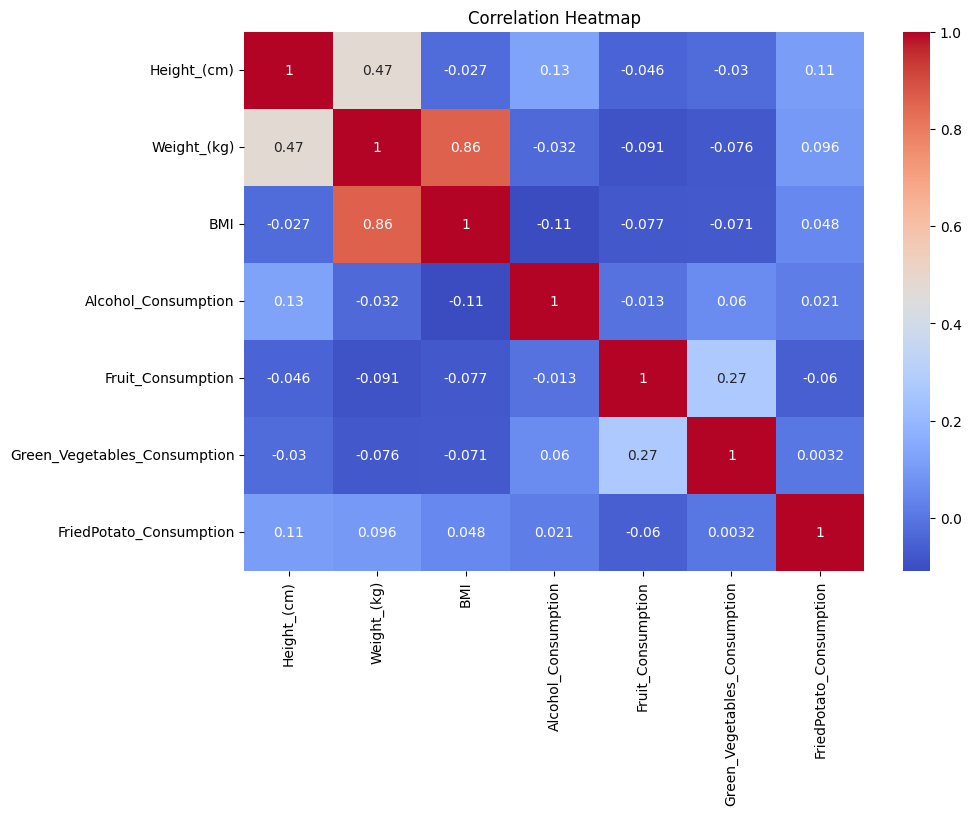

In [7]:
# Selecting numerical features for correlation analysis
numerical_features_corr = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                           'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculating the correlation matrix
correlation_matrix = heart_disease_df[numerical_features_corr].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [9]:
import io
framingham_df = pd.read_csv(io.BytesIO(uploaded["framingham.csv"]),encoding='latin')

In [10]:
# Displaying the first few rows and basic statistics of the dataset
framingham_head = framingham_df.head()
framingham_summary = framingham_df.describe(include='all')

framingham_head, framingham_summary


(   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     1   39        4.0              0         0.0     0.0                0   
 1     0   46        2.0              0         0.0     0.0                0   
 2     1   48        1.0              1        20.0     0.0                0   
 3     0   61        3.0              1        30.0     0.0                0   
 4     0   46        3.0              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0           0  
 1

In [11]:
# Checking for missing values in the Framingham Heart Study dataset
framingham_missing_values = framingham_df.isnull().sum()
framingham_missing_values[framingham_missing_values > 0]


education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [12]:
# Filling missing values for numerical features with the median
numerical_features_missing = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
for feature in numerical_features_missing:
    framingham_df[feature].fillna(framingham_df[feature].median(), inplace=True)

# Filling missing values for categorical features with the mode
categorical_features_missing = ['education']
for feature in categorical_features_missing:
    framingham_df[feature].fillna(framingham_df[feature].mode()[0], inplace=True)

# Confirming that there are no more missing values
framingham_missing_values_after_filling = framingham_df.isnull().sum()
framingham_missing_values_after_filling[framingham_missing_values_after_filling > 0]


Series([], dtype: int64)

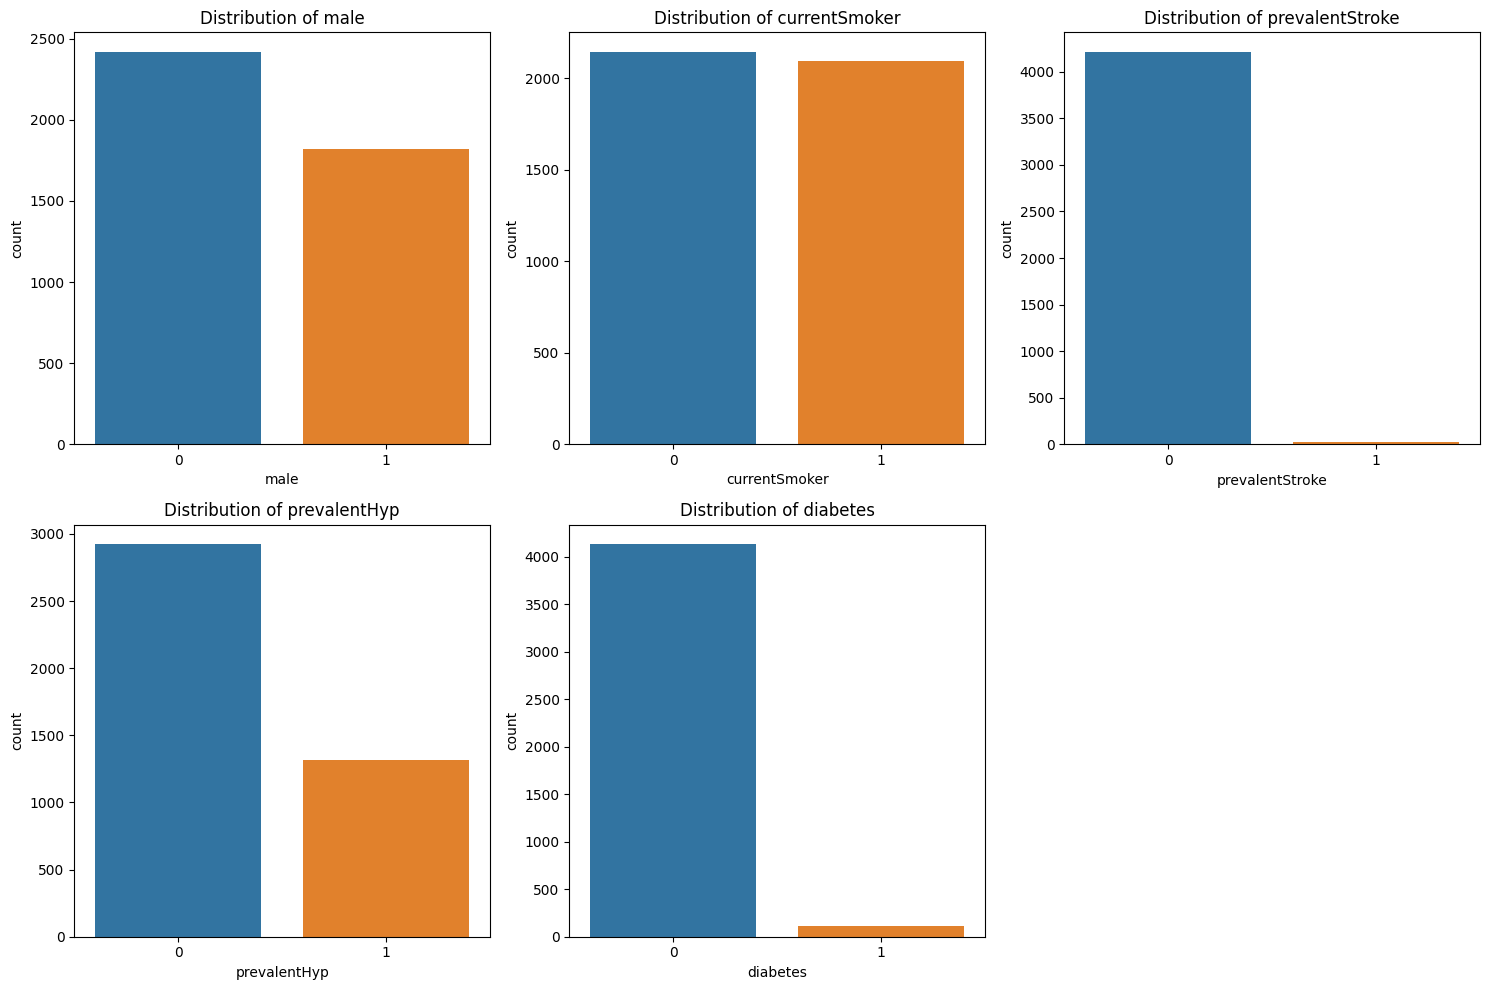

In [13]:
# List of categorical features to analyze
framingham_categorical_features = ['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Plotting the distribution of categorical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(framingham_categorical_features):
    plt.subplot(2, 3, idx + 1)
    sns.countplot(data=framingham_df, x=feature, order=framingham_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


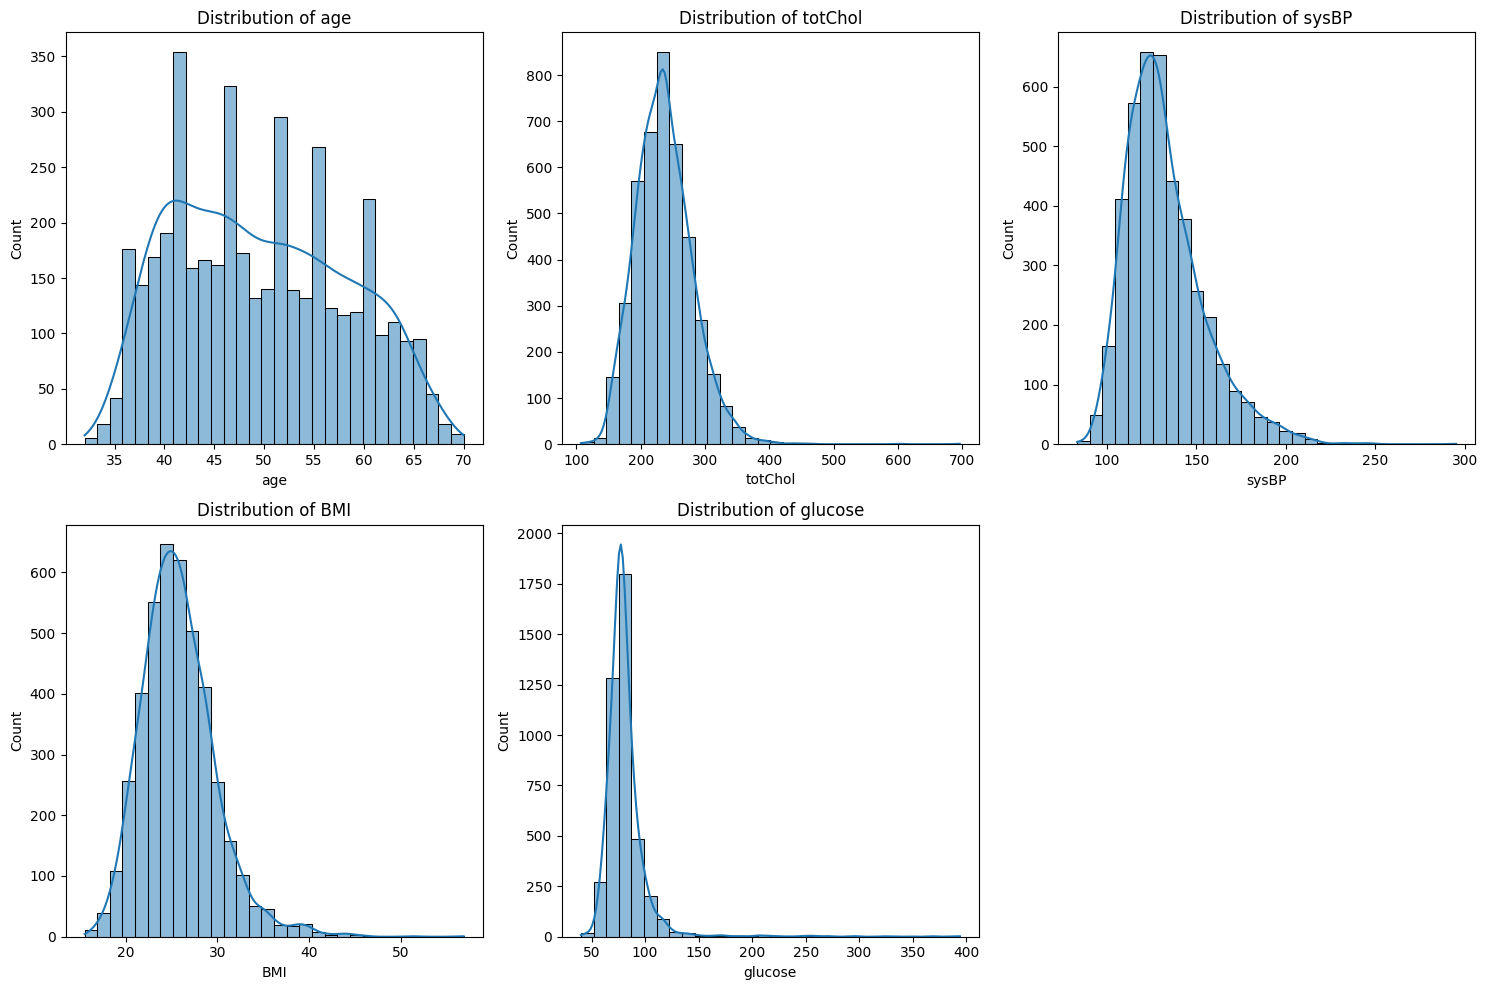

In [14]:
# List of numerical features to analyze
framingham_numerical_features = ['age', 'totChol', 'sysBP', 'BMI', 'glucose']

# Plotting the distribution of numerical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(framingham_numerical_features):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(framingham_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


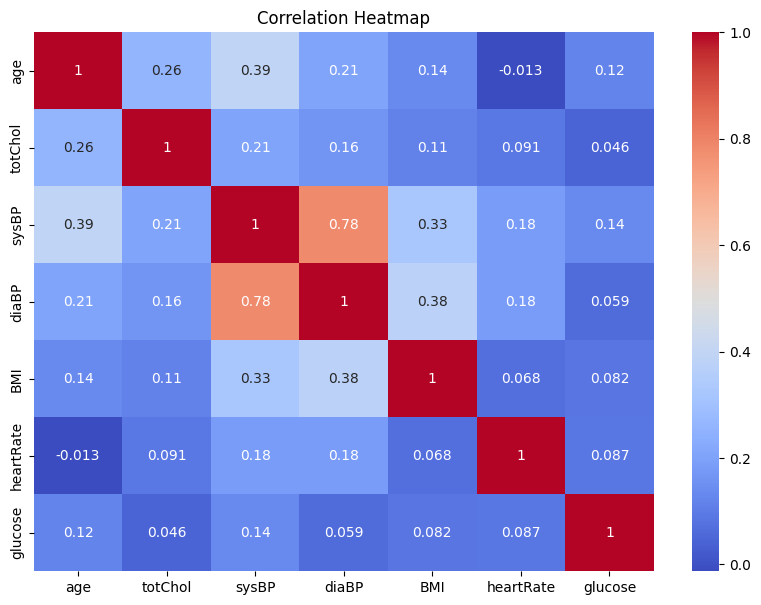

In [15]:
# Selecting numerical features for correlation analysis
framingham_numerical_features_corr = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Calculating the correlation matrix
framingham_correlation_matrix = framingham_df[framingham_numerical_features_corr].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(framingham_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# MACHINE LEARNING

In [20]:
from sklearn.utils import resample
df_no = heart_disease_df[heart_disease_df['Heart_Disease'] == 'No']
df_yes = heart_disease_df[heart_disease_df['Heart_Disease'] == 'Yes']
df_minority_upsampled = resample(df_yes,replace=True,n_samples=150000)
new_df = pd.concat([df_no, df_minority_upsampled])
from sklearn.utils import shuffle
heart_disease_df = shuffle(new_df)

In [22]:
heart_disease_df['Heart_Disease'].value_counts()

No     283883
Yes    150000
Name: Heart_Disease, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copying the original dataset
heart_disease_data = heart_disease_df.copy()

# Encoding categorical variables
label_columns = heart_disease_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in label_columns:
    heart_disease_data[column] = label_encoder.fit_transform(heart_disease_data[column])

# Splitting the data into features (X) and target (y)
X_heart = heart_disease_data.drop(columns=['Heart_Disease'])
y_heart = heart_disease_data['Heart_Disease']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_heart_train.shape, X_heart_test.shape, y_heart_train.shape, y_heart_test.shape


((347106, 18), (86777, 18), (347106,), (86777,))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creating and training the Logistic Regression model
logistic_model_heart = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_heart.fit(X_heart_train, y_heart_train)

# Predicting the target values for the test set
y_heart_pred_logistic = logistic_model_heart.predict(X_heart_test)

# Calculating the accuracy of the Logistic Regression model
accuracy_logistic_heart = accuracy_score(y_heart_test, y_heart_pred_logistic)
accuracy_logistic_heart

0.7402537538748747

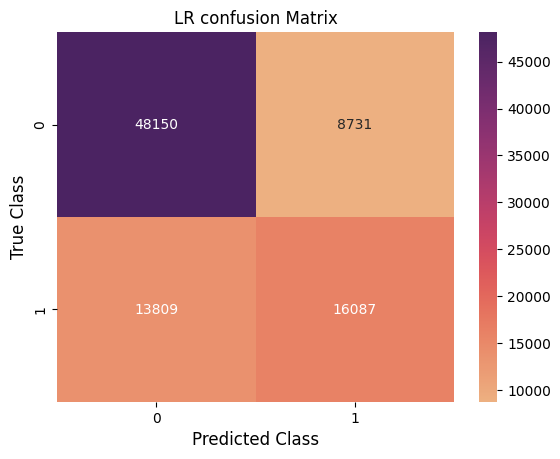

In [26]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_heart_test,y_heart_pred_logistic)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("LR confusion Matrix",fontsize=12)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
random_forest_model_heart = RandomForestClassifier(random_state=42)
random_forest_model_heart.fit(X_heart_train, y_heart_train)

# Predicting the target values for the test set
y_heart_pred_rf = random_forest_model_heart.predict(X_heart_test)

# Calculating the accuracy of the Random Forest model
accuracy_rf_heart = accuracy_score(y_heart_test, y_heart_pred_rf)
accuracy_rf_heart

0.9826105995828388

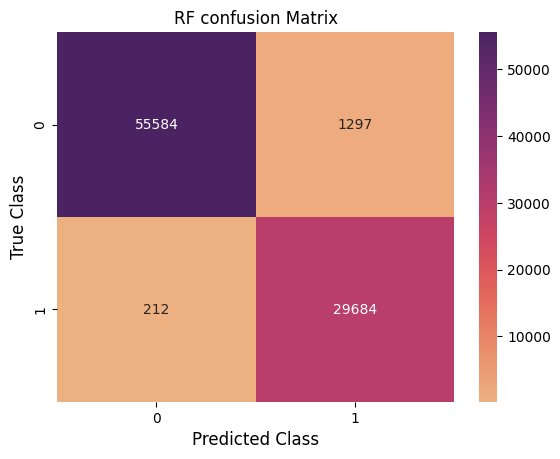

In [28]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_heart_test,y_heart_pred_rf)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("RF confusion Matrix",fontsize=12)
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating and training the Gradient Boosting model
gradient_boosting_model_heart = GradientBoostingClassifier(random_state=42)
gradient_boosting_model_heart.fit(X_heart_train, y_heart_train)

# Predicting the target values for the test set
y_heart_pred_gb = gradient_boosting_model_heart.predict(X_heart_test)

# Calculating the accuracy of the Gradient Boosting model
accuracy_gb_heart = accuracy_score(y_heart_test, y_heart_pred_gb)
accuracy_gb_heart

0.768302660843311

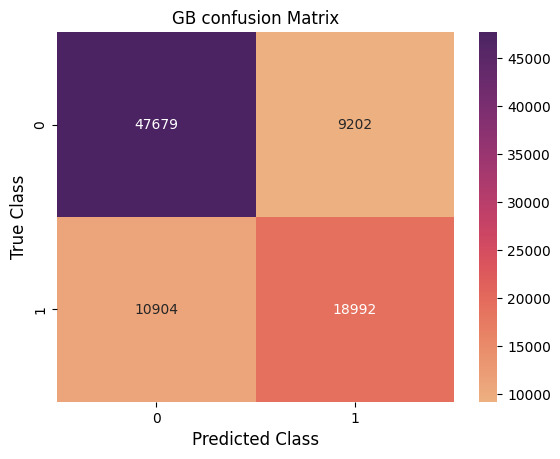

In [30]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_heart_test,y_heart_pred_gb)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("GB confusion Matrix",fontsize=12)
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree model
decision_tree_model_heart = DecisionTreeClassifier(random_state=42)
decision_tree_model_heart.fit(X_heart_train, y_heart_train)

# Predicting the target values for the test set
y_heart_pred_dt = decision_tree_model_heart.predict(X_heart_test)

# Calculating the accuracy of the Decision Tree model
accuracy_dt_heart = accuracy_score(y_heart_test, y_heart_pred_dt)
accuracy_dt_heart


0.9404911439667193

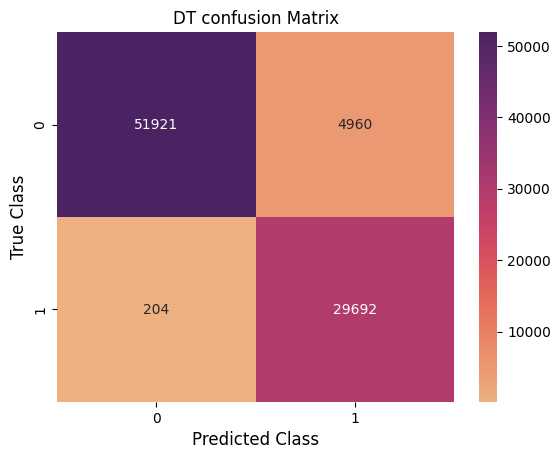

In [32]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_heart_test,y_heart_pred_dt)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("DT confusion Matrix",fontsize=12)
plt.show()

In [36]:
# Splitting the data into features (X) and target (y)
X_framingham = framingham_df.drop(columns=['TenYearCHD'])
y_framingham = framingham_df['TenYearCHD']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_framingham_train, X_framingham_test, y_framingham_train, y_framingham_test = train_test_split(X_framingham, y_framingham, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_framingham_train.shape, X_framingham_test.shape, y_framingham_train.shape, y_framingham_test.shape

((3390, 18), (848, 18), (3390,), (848,))

In [37]:
# Selecting only the aligned common features for testing (excluding 'Diabetes')
common_features_aligned = ['BMI', 'Smoking_History', 'Sex', 'Age_Category']
X_framingham_test_aligned = framingham_df.loc[X_framingham_test.index, common_features_aligned]

# Encoding the Age_Category column to match the Heart Disease Prediction dataset
X_framingham_test_aligned['Age_Category'] = label_encoder.fit_transform(X_framingham_test_aligned['Age_Category'].astype(str))

# Selecting the corresponding features from the Heart Disease Prediction dataset
X_heart_test_aligned = X_heart_test[common_features_aligned]

# Checking the transformed test dataset
X_framingham_test_aligned.head(), X_framingham_test_aligned.shape, X_heart_test_aligned.shape

(        BMI  Smoking_History     Sex  Age_Category
 3188  27.13                0    Male             3
 764   27.98                0    Male             1
 3264  20.24                1  Female             2
 1967  28.68                1    Male             1
 2185  20.24                1  Female             1,
 (848, 4),
 (86777, 4))

In [40]:
# Encoding the Sex column in the Framingham test dataset
X_framingham_test_aligned['Sex'] = label_encoder.fit_transform(X_framingham_test_aligned['Sex'])

In [38]:
# Selecting only the common features for training
X_heart_train_common = X_heart_train[common_features_aligned]
X_heart_test_common = X_heart_test[common_features_aligned]

# Creating and training the Logistic Regression model using common features
logistic_model_heart_common = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_heart_common.fit(X_heart_train_common, y_heart_train)

# Predicting the target values for the Heart Disease Prediction test set
y_heart_pred_logistic_common = logistic_model_heart_common.predict(X_heart_test_common)

# Calculating the accuracy of the Logistic Regression model on the Heart Disease Prediction dataset
accuracy_logistic_heart_common = accuracy_score(y_heart_test, y_heart_pred_logistic_common)
accuracy_logistic_heart_common

0.7230256865298409

In [41]:
# Predicting the target values for the Framingham test set using the Logistic Regression model trained on common features
y_framingham_pred_logistic_common = logistic_model_heart_common.predict(X_framingham_test_aligned)

# Calculating the accuracy of the Logistic Regression model on the Framingham dataset
accuracy_logistic_framingham_common = accuracy_score(y_framingham_test, y_framingham_pred_logistic_common)
accuracy_logistic_framingham_common

0.8537735849056604

In [42]:
# Creating and training the Random Forest model using common features
random_forest_model_heart_common = RandomForestClassifier(random_state=42)
random_forest_model_heart_common.fit(X_heart_train_common, y_heart_train)

# Predicting the target values for the Heart Disease Prediction test set
y_heart_pred_rf_common = random_forest_model_heart_common.predict(X_heart_test_common)

# Calculating the accuracy of the Random Forest model on the Heart Disease Prediction dataset
accuracy_rf_heart_common = accuracy_score(y_heart_test, y_heart_pred_rf_common)

# Predicting the target values for the Framingham test set
y_framingham_pred_rf_common = random_forest_model_heart_common.predict(X_framingham_test_aligned)

# Calculating the accuracy of the Random Forest model on the Framingham dataset
accuracy_rf_framingham_common = accuracy_score(y_framingham_test, y_framingham_pred_rf_common)

accuracy_rf_heart_common, accuracy_rf_framingham_common

(0.7850813003445614, 0.8443396226415094)

In [43]:
# Creating and training the Gradient Boosting model using common features
gradient_boosting_model_heart_common = GradientBoostingClassifier(random_state=42)
gradient_boosting_model_heart_common.fit(X_heart_train_common, y_heart_train)

# Predicting the target values for the Heart Disease Prediction test set
y_heart_pred_gb_common = gradient_boosting_model_heart_common.predict(X_heart_test_common)

# Calculating the accuracy of the Gradient Boosting model on the Heart Disease Prediction dataset
accuracy_gb_heart_common = accuracy_score(y_heart_test, y_heart_pred_gb_common)

# Predicting the target values for the Framingham test set
y_framingham_pred_gb_common = gradient_boosting_model_heart_common.predict(X_framingham_test_aligned)

# Calculating the accuracy of the Gradient Boosting model on the Framingham dataset
accuracy_gb_framingham_common = accuracy_score(y_framingham_test, y_framingham_pred_gb_common)

accuracy_gb_heart_common, accuracy_gb_framingham_common

(0.7253419684939558, 0.8537735849056604)

In [44]:
# Creating and training the Decision Tree model using common features
decision_tree_model_heart_common = DecisionTreeClassifier(random_state=42)
decision_tree_model_heart_common.fit(X_heart_train_common, y_heart_train)

# Predicting the target values for the Heart Disease Prediction test set
y_heart_pred_dt_common = decision_tree_model_heart_common.predict(X_heart_test_common)

# Calculating the accuracy of the Decision Tree model on the Heart Disease Prediction dataset
accuracy_dt_heart_common = accuracy_score(y_heart_test, y_heart_pred_dt_common)

# Predicting the target values for the Framingham test set
y_framingham_pred_dt_common = decision_tree_model_heart_common.predict(X_framingham_test_aligned)

# Calculating the accuracy of the Decision Tree model on the Framingham dataset
accuracy_dt_framingham_common = accuracy_score(y_framingham_test, y_framingham_pred_dt_common)

accuracy_dt_heart_common, accuracy_dt_framingham_common

(0.7845281583829816, 0.839622641509434)